### Generating Overfit Tree Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size


from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

In [24]:
data = pd.read_csv('data/Whickham.txt')

In [25]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [26]:
data['smoker'] = data['smoker'].map({'Yes': 1, 'No': 0})
data.head()

,outcome,smoker,age
0,Alive,1,23
1,Alive,1,18
2,Dead,1,71
3,Alive,0,67
4,Alive,0,64


In [63]:
X = data[['smoker', 'age']]
y = data['outcome']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [67]:
rows = []
for i in range(10):
    dtm = DecisionTreeClassifier(max_depth = i + 1).fit(X_train,y_train)
    ytr_pred = dtm.predict(X_train)
    accuracy_train = accuracy_score(y_train, ytr_pred)
    y_pred = dtm.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    rows.append([accuracy_train, accuracy_test])


In [68]:
rows

[[0.8356909684439608, 0.8911392405063291],
 [0.8356909684439608, 0.8911392405063291],
 [0.8367791077257889, 0.8835443037974684],
 [0.8389553862894451, 0.8556962025316456],
 [0.8422198041349293, 0.8683544303797468],
 [0.8443960826985855, 0.8784810126582279],
 [0.8487486398258978, 0.8607594936708861],
 [0.8487486398258978, 0.8658227848101265],
 [0.8487486398258978, 0.8658227848101265],
 [0.8487486398258978, 0.8658227848101265]]

In [70]:
df = pd.DataFrame(rows, columns = ['Training Accuracy', 'Testing Accuracy'])
df


,Training Accuracy,Testing Accuracy
0,0.835691,0.891139
1,0.835691,0.891139
2,0.836779,0.883544
3,0.838955,0.855696
4,0.842220,0.868354
5,0.844396,0.878481
6,0.848749,0.860759
7,0.848749,0.865823
8,0.848749,0.865823
9,0.848749,0.865823


<AxesSubplot:>

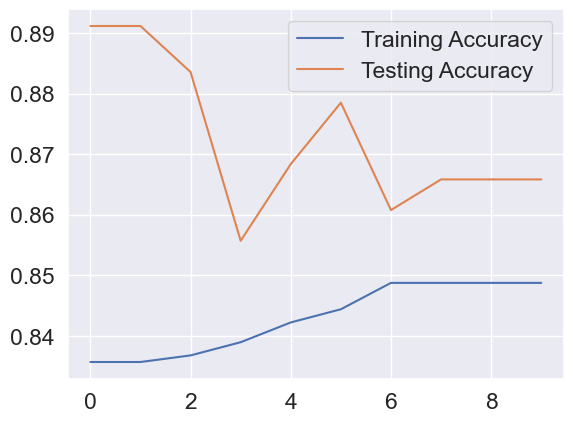

In [73]:
df.plot(y = ['Training Accuracy', 'Testing Accuracy'], use_index = True)

<AxesSubplot:xlabel='age', ylabel='smoker'>

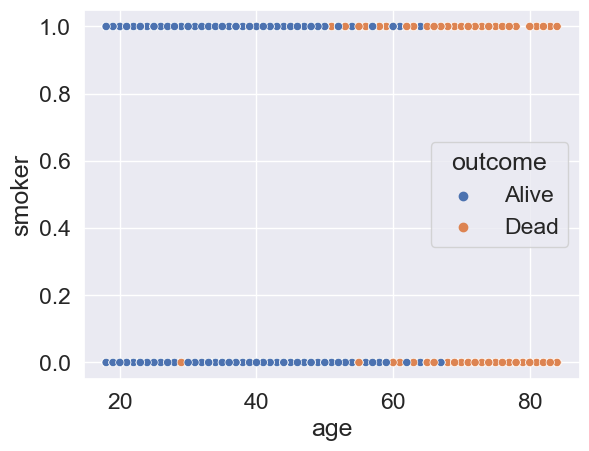

In [52]:
sns.scatterplot(data = data, x = 'age', y = 'smoker', hue = 'outcome' )

In [53]:
dtm = DecisionTreeClassifier(max_depth = 1).fit(X_train,y_train)

In [54]:
ytr_pred = dtm.predict(X_train)

In [55]:
accuracy_train = accuracy_score(y_train, ytr_pred)
print(accuracy_train)

0.8356909684439608


In [56]:
y_pred = dtm.predict(X_test)

In [49]:
accuracy_test = accuracy_score(y_test, y_pred)
print(accuracy_test)